<h1> Example K-Fold Cross-Eval Models </h1>
<p> First, we'll import the 'ML' module, to use its 'Classifier' class, os, </p>
<p> and TQDM, which is a handy pip-installable package that gives us nice loading bars. </p>

In [1]:
import ML, os
from tqdm import tqdm
import glob

<h2> Set your paths! </h2>
<p> 'patient_path' points to our 'condition-positive' dataset; in this example it points to spectral data in the 'ref pain' study folder, using the P300 task data, with 500-sample-long contig windows and all channels </p>
<p> 'reference_path' points to a folder containing healthy control data study folders </p>

In [2]:
folders = [
#     "/wavi/EEGstudies/CANlab/erps/P300_250_1111111111111111111_0_1",
#     "/wavi/EEGstudies/CANlab/erps/P300_250_1111111111111111111_1_1",
#     "/wavi/EEGstudies/CANlab/erps/P300_250_1111111111111111111_2_1",
#     "/wavi/EEGstudies/CANlab/spectra/P300_250_1111111111111111111_0_1",
#     "/wavi/EEGstudies/CANlab/spectra/P300_250_1111111111111111111_1_1",
#     "/wavi/EEGstudies/CANlab/spectra/P300_250_1111111111111111111_2_1",
#     "/wavi/EEGstudies/CANlab/contigs/P300_250_1111111111111111111_0",
#     "/wavi/EEGstudies/CANlab/contigs/P300_250_1111111111111111111_1",
#     "/wavi/EEGstudies/CANlab/contigs/P300_250_1111111111111111111_2",
#     "/wavi/EEGstudies/CANlab/contigs/P300_750_1111111111111111111_0",
#     "/wavi/EEGstudies/CANlab/contigs/P300_750_1111111111111111111_1",
#     "/wavi/EEGstudies/CANlab/contigs/P300_750_1111111111111111111_2",
#     "/wavi/EEGstudies/CANlab/contigs/P300_1250_1111111111111111111_0",
#     "/wavi/EEGstudies/CANlab/contigs/P300_1250_1111111111111111111_1",
#     "/wavi/EEGstudies/CANlab/contigs/P300_1250_1111111111111111111_2",
#     "/wavi/EEGstudies/CANlab/spectra/P300_250_1111111111111111111_0",
#     "/wavi/EEGstudies/CANlab/spectra/P300_250_1111111111111111111_1",
#     "/wavi/EEGstudies/CANlab/spectra/P300_250_1111111111111111111_2",
#     "/wavi/EEGstudies/CANlab/spectra/P300_750_1111111111111111111_0",
#     "/wavi/EEGstudies/CANlab/spectra/P300_750_1111111111111111111_1",
#     "/wavi/EEGstudies/CANlab/spectra/P300_750_1111111111111111111_2",
#     "/wavi/EEGstudies/CANlab/spectra/P300_1250_1111111111111111111_0",
#     "/wavi/EEGstudies/CANlab/spectra/P300_1250_1111111111111111111_1",
#     "/wavi/EEGstudies/CANlab/spectra/P300_1250_1111111111111111111_2",
    "/wavi/EEGstudies/CANlab/erps/P300_250_0000001111001111011_0_1",
    "/wavi/EEGstudies/CANlab/erps/P300_250_0000001111001111011_1_1",
#     "/wavi/EEGstudies/CANlab/erps/P300_250_0000001111001111011_2_1",
    "/wavi/EEGstudies/CANlab/spectra/P300_250_0000001111001111011_0_1",
    "/wavi/EEGstudies/CANlab/spectra/P300_250_0000001111001111011_1_1",
#     "/wavi/EEGstudies/CANlab/spectra/P300_250_0000001111001111011_2_1",
    "/wavi/EEGstudies/CANlab/erps/P300_250_1111110000110000100_0_1",
    "/wavi/EEGstudies/CANlab/erps/P300_250_1111110000110000100_1_1",
#     "/wavi/EEGstudies/CANlab/erps/P300_250_1111110000110000100_2_1",
    "/wavi/EEGstudies/CANlab/spectra/P300_250_1111110000110000100_0_1",
    "/wavi/EEGstudies/CANlab/spectra/P300_250_1111110000110000100_1_1",
#     "/wavi/EEGstudies/CANlab/spectra/P300_250_1111110000110000100_2_1",
]

reference_path = "/wavi/EEGstudies"

<h3> Instantiate a 'Classifier' Object </h3>
<p> 'Classifier' takes one positional argument, currently either "spectra", "contigs", or "erps" </p>

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/100
76/76 [==============================] - 7s 86ms/step - loss: 0.6371 - accuracy: 0.6560 - val_loss: 0.7305 - val_accuracy: 0.4300
Epoch 2/100
76/76 [==============================] - 6s 83ms/step - loss: 0.5330 - accuracy: 0.7726 - val_loss: 0.9411 - val_accuracy: 0.2748
Epoch 3/100
76/76 [==============================] - 6s 85ms/step - loss: 0.5099 - accuracy: 0.7963 - val_loss: 0.9708 - val_accuracy: 0.2901
Epoch 4/100
76/76 [==============================] - 6s 86ms/step - loss: 0.4699 - accuracy: 0.8292 - val_loss: 1.0243 - val_accuracy: 0.2824
Epoch 5/100
76/76 [==============================] - 6s 84ms/step - loss: 0.4693 - accuracy: 0.8230 - val_loss: 0.9280 - val_accuracy: 0.4911
Epoch 6/100
76/76 [==============================] - 6s 85ms/step - loss: 0.5120 - accuracy: 0.8113 - val_loss: 0.9424 - val_accuracy: 0.3130
Epoch 7/100
76/76 [==============================] - 6s 83ms/step - loss: 0.4639 - accuracy: 0.8413 - val_loss: 1.0003 - val_accuracy: 0.2952
Epoch 

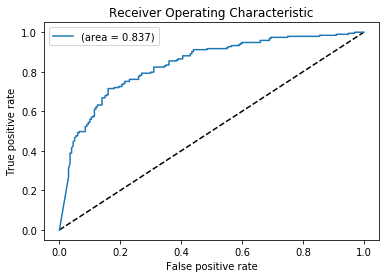

 20%|██        | 1/5 [10:47<43:08, 647.06s/it]

Epoch 1/100
69/69 [==============================] - 6s 85ms/step - loss: 0.6763 - accuracy: 0.5994 - val_loss: 0.7245 - val_accuracy: 0.3210
Epoch 2/100
69/69 [==============================] - 6s 82ms/step - loss: 0.6303 - accuracy: 0.6594 - val_loss: 0.6529 - val_accuracy: 0.6689
Epoch 3/100
69/69 [==============================] - 6s 82ms/step - loss: 0.5881 - accuracy: 0.6990 - val_loss: 0.6742 - val_accuracy: 0.6336
Epoch 4/100
69/69 [==============================] - 6s 82ms/step - loss: 0.5574 - accuracy: 0.7403 - val_loss: 0.7107 - val_accuracy: 0.6084
Epoch 5/100
69/69 [==============================] - 6s 82ms/step - loss: 0.5559 - accuracy: 0.7372 - val_loss: 0.7396 - val_accuracy: 0.6218
Epoch 6/100
69/69 [==============================] - 6s 82ms/step - loss: 0.5294 - accuracy: 0.7685 - val_loss: 0.7378 - val_accuracy: 0.5983
Epoch 7/100
69/69 [==============================] - 6s 82ms/step - loss: 0.5278 - accuracy: 0.7690 - val_loss: 0.7266 - val_accuracy: 0.6403
Epoch 

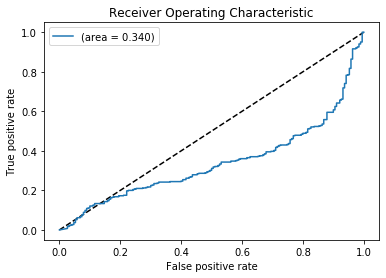

 40%|████      | 2/5 [20:23<31:17, 625.98s/it]

Epoch 1/100
68/68 [==============================] - 6s 84ms/step - loss: 0.6956 - accuracy: 0.5044 - val_loss: 0.6794 - val_accuracy: 0.6387
Epoch 2/100
68/68 [==============================] - 6s 83ms/step - loss: 0.6926 - accuracy: 0.5215 - val_loss: 0.7084 - val_accuracy: 0.3597
Epoch 3/100
68/68 [==============================] - 6s 83ms/step - loss: 0.6918 - accuracy: 0.5224 - val_loss: 0.7105 - val_accuracy: 0.3645
Epoch 4/100
68/68 [==============================] - 6s 82ms/step - loss: 0.6905 - accuracy: 0.5270 - val_loss: 0.7238 - val_accuracy: 0.3661
Epoch 5/100
68/68 [==============================] - 6s 82ms/step - loss: 0.6891 - accuracy: 0.5303 - val_loss: 0.7224 - val_accuracy: 0.3645
Epoch 6/100
68/68 [==============================] - 6s 82ms/step - loss: 0.6860 - accuracy: 0.5349 - val_loss: 0.7319 - val_accuracy: 0.3724
Epoch 7/100
68/68 [==============================] - 6s 82ms/step - loss: 0.6830 - accuracy: 0.5326 - val_loss: 0.7469 - val_accuracy: 0.3677
Epoch 

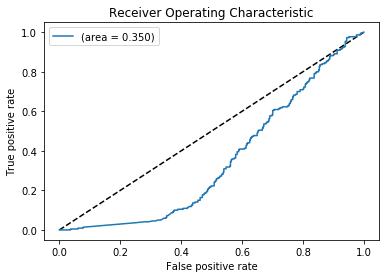

 60%|██████    | 3/5 [30:08<20:26, 613.45s/it]

Epoch 1/100
68/68 [==============================] - 6s 84ms/step - loss: 0.6838 - accuracy: 0.5638 - val_loss: 0.6410 - val_accuracy: 0.6790
Epoch 2/100
68/68 [==============================] - 6s 83ms/step - loss: 0.6696 - accuracy: 0.5905 - val_loss: 0.6646 - val_accuracy: 0.6035
Epoch 3/100
68/68 [==============================] - 6s 84ms/step - loss: 0.6584 - accuracy: 0.6080 - val_loss: 0.7138 - val_accuracy: 0.4093
Epoch 4/100
68/68 [==============================] - 6s 83ms/step - loss: 0.6401 - accuracy: 0.6472 - val_loss: 0.7356 - val_accuracy: 0.4607
Epoch 5/100
68/68 [==============================] - 6s 83ms/step - loss: 0.6267 - accuracy: 0.6656 - val_loss: 0.7311 - val_accuracy: 0.4799
Epoch 6/100
68/68 [==============================] - 6s 82ms/step - loss: 0.6141 - accuracy: 0.6859 - val_loss: 0.6649 - val_accuracy: 0.6100
Epoch 7/100
68/68 [==============================] - 6s 82ms/step - loss: 0.6026 - accuracy: 0.6983 - val_loss: 0.7390 - val_accuracy: 0.4880
Epoch 

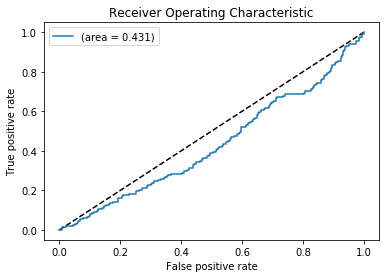

 80%|████████  | 4/5 [39:37<10:00, 600.30s/it]

Epoch 1/100
71/71 [==============================] - 6s 83ms/step - loss: 0.6612 - accuracy: 0.6276 - val_loss: 0.6756 - val_accuracy: 0.5942
Epoch 2/100
71/71 [==============================] - 6s 81ms/step - loss: 0.6308 - accuracy: 0.6748 - val_loss: 0.6780 - val_accuracy: 0.5888
Epoch 3/100
71/71 [==============================] - 6s 82ms/step - loss: 0.6238 - accuracy: 0.6762 - val_loss: 0.6615 - val_accuracy: 0.6250
Epoch 4/100
71/71 [==============================] - 6s 81ms/step - loss: 0.6095 - accuracy: 0.6922 - val_loss: 0.6702 - val_accuracy: 0.6033
Epoch 5/100
71/71 [==============================] - 6s 81ms/step - loss: 0.5972 - accuracy: 0.7110 - val_loss: 0.6429 - val_accuracy: 0.6721
Epoch 6/100
71/71 [==============================] - 6s 81ms/step - loss: 0.5803 - accuracy: 0.7346 - val_loss: 0.6459 - val_accuracy: 0.6594
Epoch 7/100
71/71 [==============================] - 6s 81ms/step - loss: 0.5749 - accuracy: 0.7355 - val_loss: 0.6785 - val_accuracy: 0.5906
Epoch 

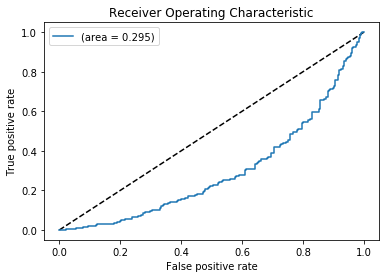

100%|██████████| 5/5 [49:23<00:00, 592.71s/it]


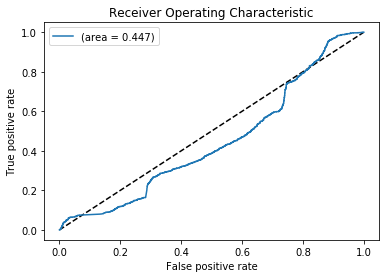

[0.8369041450777202, 0.6598375568551007, 0.6503207255032073, 0.5688415688415688, 0.7050793821068441]


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/100
119/119 [==============================] - 11s 89ms/step - loss: 0.6802 - accuracy: 0.5585 - val_loss: 0.6741 - val_accuracy: 0.6773
Epoch 2/100
119/119 [==============================] - 10s 87ms/step - loss: 0.6464 - accuracy: 0.6333 - val_loss: 0.6954 - val_accuracy: 0.5783
Epoch 3/100
119/119 [==============================] - 10s 85ms/step - loss: 0.6073 - accuracy: 0.6930 - val_loss: 0.7895 - val_accuracy: 0.4582
Epoch 4/100
119/119 [==============================] - 10s 84ms/step - loss: 0.5606 - accuracy: 0.7395 - val_loss: 0.7948 - val_accuracy: 0.4759
Epoch 5/100
119/119 [==============================] - 10s 82ms/step - loss: 0.5315 - accuracy: 0.7661 - val_loss: 1.1848 - val_accuracy: 0.1649
Epoch 6/100
119/119 [==============================] - 10s 84ms/step - loss: 0.5102 - accuracy: 0.7819 - val_loss: 1.2549 - val_accuracy: 0.1602
Epoch 7/100
119/119 [==============================] - 10s 88ms/step - loss: 0.4858 - accuracy: 0.7995 - val_loss: 1.2973 - val_ac

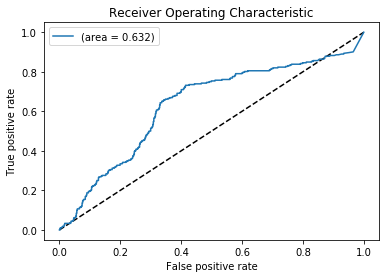

 20%|██        | 1/5 [16:42<1:06:49, 1002.31s/it]

Epoch 1/100
112/112 [==============================] - 10s 89ms/step - loss: 0.6581 - accuracy: 0.6125 - val_loss: 0.7260 - val_accuracy: 0.5180
Epoch 2/100
112/112 [==============================] - 10s 89ms/step - loss: 0.6149 - accuracy: 0.6772 - val_loss: 0.7194 - val_accuracy: 0.5116
Epoch 3/100
112/112 [==============================] - 9s 84ms/step - loss: 0.5838 - accuracy: 0.7187 - val_loss: 0.6466 - val_accuracy: 0.6272
Epoch 4/100
112/112 [==============================] - 10s 85ms/step - loss: 0.5581 - accuracy: 0.7478 - val_loss: 0.6182 - val_accuracy: 0.6790
Epoch 5/100
112/112 [==============================] - 9s 84ms/step - loss: 0.5397 - accuracy: 0.7562 - val_loss: 0.5938 - val_accuracy: 0.6920
Epoch 6/100
112/112 [==============================] - 10s 87ms/step - loss: 0.5236 - accuracy: 0.7767 - val_loss: 0.5633 - val_accuracy: 0.7317
Epoch 7/100
112/112 [==============================] - 10s 85ms/step - loss: 0.5052 - accuracy: 0.7941 - val_loss: 0.5342 - val_accu

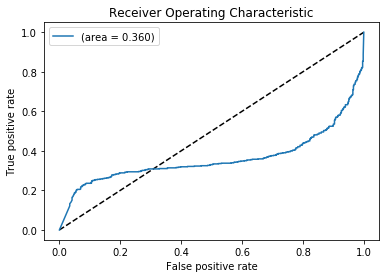

 40%|████      | 2/5 [32:51<49:37, 992.36s/it]   

Epoch 1/100
112/112 [==============================] - 9s 84ms/step - loss: 0.6786 - accuracy: 0.5722 - val_loss: 0.6875 - val_accuracy: 0.5557
Epoch 2/100
112/112 [==============================] - 9s 84ms/step - loss: 0.6364 - accuracy: 0.6439 - val_loss: 0.7392 - val_accuracy: 0.5603
Epoch 3/100
112/112 [==============================] - 9s 83ms/step - loss: 0.5908 - accuracy: 0.7030 - val_loss: 0.6459 - val_accuracy: 0.6271
Epoch 4/100
112/112 [==============================] - 9s 84ms/step - loss: 0.5501 - accuracy: 0.7480 - val_loss: 0.6373 - val_accuracy: 0.6336
Epoch 5/100
112/112 [==============================] - 9s 83ms/step - loss: 0.4970 - accuracy: 0.7951 - val_loss: 0.6462 - val_accuracy: 0.6531
Epoch 6/100
112/112 [==============================] - 9s 83ms/step - loss: 0.4757 - accuracy: 0.8099 - val_loss: 0.7022 - val_accuracy: 0.6187
Epoch 7/100
112/112 [==============================] - 9s 84ms/step - loss: 0.4421 - accuracy: 0.8323 - val_loss: 0.7967 - val_accuracy:

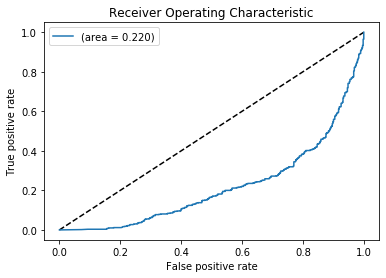

 60%|██████    | 3/5 [48:50<32:44, 982.35s/it]

Epoch 1/100
120/120 [==============================] - 10s 85ms/step - loss: 0.6771 - accuracy: 0.5819 - val_loss: 0.7076 - val_accuracy: 0.4619
Epoch 2/100
120/120 [==============================] - 10s 84ms/step - loss: 0.6394 - accuracy: 0.6491 - val_loss: 0.7433 - val_accuracy: 0.4869
Epoch 3/100
120/120 [==============================] - 10s 81ms/step - loss: 0.6112 - accuracy: 0.6840 - val_loss: 0.7511 - val_accuracy: 0.5083
Epoch 4/100
120/120 [==============================] - 10s 81ms/step - loss: 0.5815 - accuracy: 0.7192 - val_loss: 0.7349 - val_accuracy: 0.5310
Epoch 5/100
120/120 [==============================] - 10s 82ms/step - loss: 0.5610 - accuracy: 0.7381 - val_loss: 0.7657 - val_accuracy: 0.4821
Epoch 6/100
120/120 [==============================] - 10s 81ms/step - loss: 0.5416 - accuracy: 0.7517 - val_loss: 0.7554 - val_accuracy: 0.5357
Epoch 7/100
120/120 [==============================] - 10s 81ms/step - loss: 0.5275 - accuracy: 0.7688 - val_loss: 0.7157 - val_ac

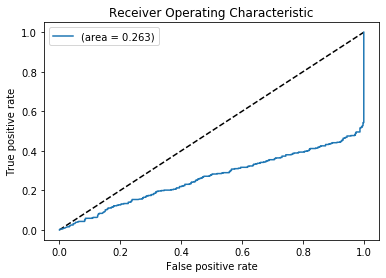

 80%|████████  | 4/5 [1:05:21<16:25, 985.01s/it]

Epoch 1/100
121/121 [==============================] - 10s 81ms/step - loss: 0.6833 - accuracy: 0.5655 - val_loss: 0.6731 - val_accuracy: 0.6097
Epoch 2/100
121/121 [==============================] - 10s 81ms/step - loss: 0.6562 - accuracy: 0.6266 - val_loss: 0.6162 - val_accuracy: 0.6983
Epoch 3/100
121/121 [==============================] - 10s 80ms/step - loss: 0.6442 - accuracy: 0.6458 - val_loss: 0.6215 - val_accuracy: 0.6883
Epoch 4/100
121/121 [==============================] - 10s 80ms/step - loss: 0.6285 - accuracy: 0.6681 - val_loss: 0.6037 - val_accuracy: 0.7070
Epoch 5/100
121/121 [==============================] - 10s 81ms/step - loss: 0.6221 - accuracy: 0.6726 - val_loss: 0.6145 - val_accuracy: 0.6958
Epoch 6/100
121/121 [==============================] - 10s 80ms/step - loss: 0.6102 - accuracy: 0.6902 - val_loss: 0.6477 - val_accuracy: 0.6596
Epoch 7/100
121/121 [==============================] - 10s 81ms/step - loss: 0.6064 - accuracy: 0.6933 - val_loss: 0.6258 - val_ac

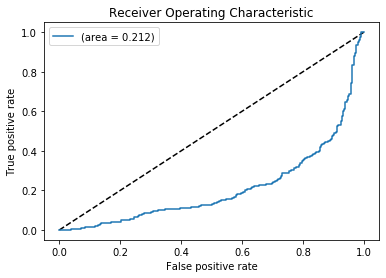

100%|██████████| 5/5 [1:21:56<00:00, 983.31s/it]


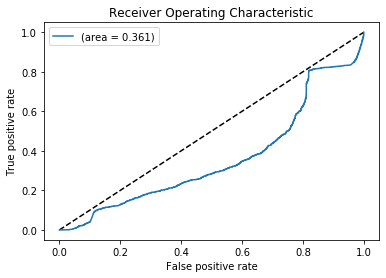

[0.6316361249872565, 0.6395558675478548, 0.7802929867599213, 0.7374769776484231, 0.7884599761275364]
 1298 26750 shaped inconsistently with dataset.
Removing it from dataset.


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/100
68/68 [==============================] - 4s 54ms/step - loss: 0.6646 - accuracy: 0.6081 - val_loss: 0.7262 - val_accuracy: 0.3564
Epoch 2/100
68/68 [==============================] - 3s 51ms/step - loss: 0.5935 - accuracy: 0.7027 - val_loss: 0.6822 - val_accuracy: 0.5190
Epoch 3/100
68/68 [==============================] - 3s 51ms/step - loss: 0.5236 - accuracy: 0.7783 - val_loss: 0.6326 - val_accuracy: 0.6661
Epoch 4/100
68/68 [==============================] - 4s 52ms/step - loss: 0.4934 - accuracy: 0.8024 - val_loss: 0.6333 - val_accuracy: 0.6661
Epoch 5/100
68/68 [==============================] - 4s 51ms/step - loss: 0.4719 - accuracy: 0.8191 - val_loss: 0.6486 - val_accuracy: 0.6626
Epoch 6/100
68/68 [==============================] - 4s 52ms/step - loss: 0.4528 - accuracy: 0.8381 - val_loss: 0.6479 - val_accuracy: 0.6661
Epoch 7/100
68/68 [==============================] - 4s 52ms/step - loss: 0.4365 - accuracy: 0.8460 - val_loss: 0.6513 - val_accuracy: 0.6661
Epoch 

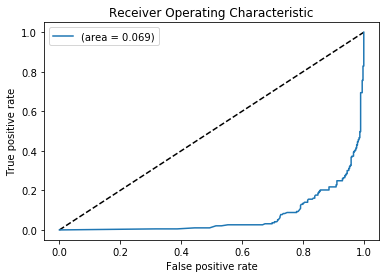

 20%|██        | 1/5 [06:01<24:05, 361.37s/it]

Epoch 1/100
71/71 [==============================] - 4s 52ms/step - loss: 0.6512 - accuracy: 0.6319 - val_loss: 0.6307 - val_accuracy: 0.8215
Epoch 2/100
71/71 [==============================] - 4s 49ms/step - loss: 0.6158 - accuracy: 0.6908 - val_loss: 0.6308 - val_accuracy: 0.8215
Epoch 3/100
71/71 [==============================] - 4s 50ms/step - loss: 0.5667 - accuracy: 0.7452 - val_loss: 0.6836 - val_accuracy: 0.6613
Epoch 4/100
71/71 [==============================] - 4s 50ms/step - loss: 0.4917 - accuracy: 0.8184 - val_loss: 0.7234 - val_accuracy: 0.6633
Epoch 5/100
71/71 [==============================] - 4s 50ms/step - loss: 0.4657 - accuracy: 0.8340 - val_loss: 0.7967 - val_accuracy: 0.1947
Epoch 6/100
71/71 [==============================] - 4s 50ms/step - loss: 0.4389 - accuracy: 0.8496 - val_loss: 0.9161 - val_accuracy: 0.1785
Epoch 7/100
71/71 [==============================] - 4s 50ms/step - loss: 0.4145 - accuracy: 0.8733 - val_loss: 0.9542 - val_accuracy: 0.2049
Epoch 

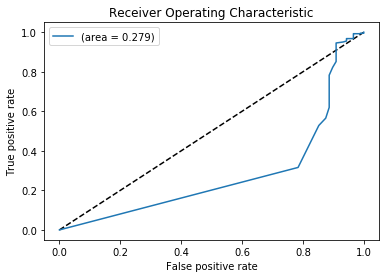

 40%|████      | 2/5 [12:04<18:05, 361.99s/it]

Epoch 1/100
69/69 [==============================] - 4s 53ms/step - loss: 0.6862 - accuracy: 0.5318 - val_loss: 0.6938 - val_accuracy: 0.4459
Epoch 2/100
69/69 [==============================] - 3s 51ms/step - loss: 0.6710 - accuracy: 0.5828 - val_loss: 0.6983 - val_accuracy: 0.4235
Epoch 3/100
69/69 [==============================] - 3s 51ms/step - loss: 0.6275 - accuracy: 0.6642 - val_loss: 0.7107 - val_accuracy: 0.4104
Epoch 4/100
69/69 [==============================] - 3s 50ms/step - loss: 0.5730 - accuracy: 0.7398 - val_loss: 0.6504 - val_accuracy: 0.6175
Epoch 5/100
69/69 [==============================] - 4s 51ms/step - loss: 0.5283 - accuracy: 0.7825 - val_loss: 0.6450 - val_accuracy: 0.5914
Epoch 6/100
69/69 [==============================] - 3s 50ms/step - loss: 0.4984 - accuracy: 0.8021 - val_loss: 0.7291 - val_accuracy: 0.5896
Epoch 7/100
69/69 [==============================] - 3s 51ms/step - loss: 0.4632 - accuracy: 0.8248 - val_loss: 0.7721 - val_accuracy: 0.5896
Epoch 

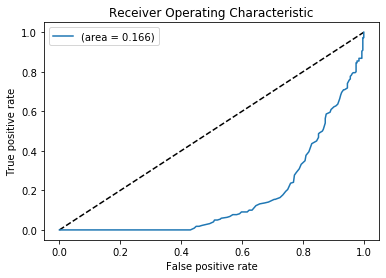

 60%|██████    | 3/5 [18:07<12:04, 362.12s/it]

Epoch 1/100
70/70 [==============================] - 4s 52ms/step - loss: 0.6699 - accuracy: 0.5656 - val_loss: 0.7136 - val_accuracy: 0.4236
Epoch 2/100
70/70 [==============================] - 4s 50ms/step - loss: 0.6045 - accuracy: 0.6892 - val_loss: 0.6754 - val_accuracy: 0.5764
Epoch 3/100
70/70 [==============================] - 4s 51ms/step - loss: 0.5607 - accuracy: 0.7465 - val_loss: 0.6685 - val_accuracy: 0.5822
Epoch 4/100
70/70 [==============================] - 4s 50ms/step - loss: 0.5027 - accuracy: 0.8151 - val_loss: 0.6983 - val_accuracy: 0.5822
Epoch 5/100
70/70 [==============================] - 4s 50ms/step - loss: 0.4703 - accuracy: 0.8412 - val_loss: 0.7110 - val_accuracy: 0.5822
Epoch 6/100
70/70 [==============================] - 4s 51ms/step - loss: 0.4426 - accuracy: 0.8593 - val_loss: 0.7203 - val_accuracy: 0.5822
Epoch 7/100
70/70 [==============================] - 4s 50ms/step - loss: 0.4246 - accuracy: 0.8624 - val_loss: 0.7290 - val_accuracy: 0.5822
Epoch 

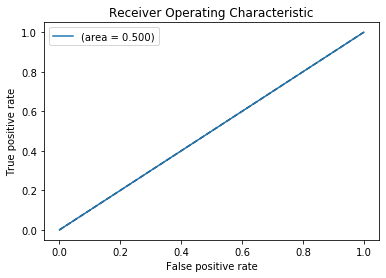

 80%|████████  | 4/5 [24:10<06:02, 362.46s/it]

Epoch 1/100
67/67 [==============================] - 4s 54ms/step - loss: 0.6817 - accuracy: 0.5264 - val_loss: 0.6978 - val_accuracy: 0.4820
Epoch 2/100
67/67 [==============================] - 3s 52ms/step - loss: 0.5896 - accuracy: 0.7740 - val_loss: 0.6948 - val_accuracy: 0.4820
Epoch 3/100
67/67 [==============================] - 3s 52ms/step - loss: 0.5236 - accuracy: 0.8324 - val_loss: 0.6875 - val_accuracy: 0.5623
Epoch 4/100
67/67 [==============================] - 3s 52ms/step - loss: 0.4815 - accuracy: 0.8588 - val_loss: 0.6787 - val_accuracy: 0.5590
Epoch 5/100
67/67 [==============================] - 4s 53ms/step - loss: 0.4661 - accuracy: 0.8564 - val_loss: 0.6823 - val_accuracy: 0.6377
Epoch 6/100
67/67 [==============================] - 4s 53ms/step - loss: 0.4399 - accuracy: 0.8804 - val_loss: 0.6851 - val_accuracy: 0.5131
Epoch 7/100
67/67 [==============================] - 4s 53ms/step - loss: 0.4168 - accuracy: 0.8936 - val_loss: 0.6828 - val_accuracy: 0.6131
Epoch 

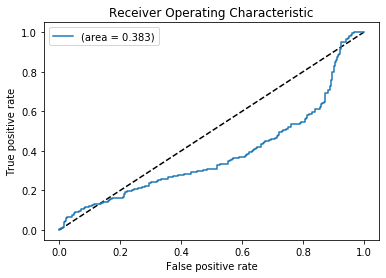

100%|██████████| 5/5 [30:09<00:00, 361.82s/it]


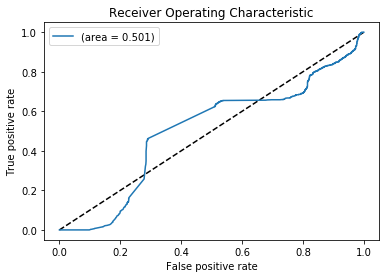

[0.9305430320974363, 0.7212682379349047, 0.8342707134637515, 0.5, 0.6169809696030311]


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/100
124/124 [==============================] - 6s 52ms/step - loss: 0.5340 - accuracy: 0.7659 - val_loss: 0.7709 - val_accuracy: 0.3333
Epoch 2/100
124/124 [==============================] - 6s 51ms/step - loss: 0.4713 - accuracy: 0.8110 - val_loss: 0.7335 - val_accuracy: 0.3394
Epoch 3/100
124/124 [==============================] - 6s 52ms/step - loss: 0.4534 - accuracy: 0.8186 - val_loss: 0.6734 - val_accuracy: 0.6654
Epoch 4/100
124/124 [==============================] - 6s 52ms/step - loss: 0.4430 - accuracy: 0.8249 - val_loss: 0.6650 - val_accuracy: 0.6667
Epoch 5/100
124/124 [==============================] - 6s 52ms/step - loss: 0.4321 - accuracy: 0.8307 - val_loss: 0.7158 - val_accuracy: 0.5470
Epoch 6/100
124/124 [==============================] - 7s 53ms/step - loss: 0.4168 - accuracy: 0.8408 - val_loss: 0.6630 - val_accuracy: 0.6667
Epoch 7/100
124/124 [==============================] - 6s 52ms/step - loss: 0.4073 - accuracy: 0.8449 - val_loss: 0.6722 - val_accuracy:

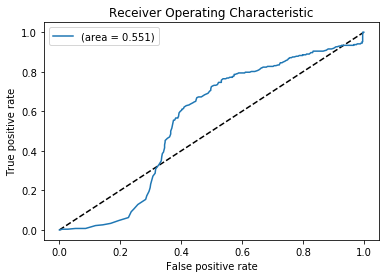

 20%|██        | 1/5 [10:46<43:04, 646.20s/it]

Epoch 1/100
114/114 [==============================] - 6s 54ms/step - loss: 0.6869 - accuracy: 0.5336 - val_loss: 0.6953 - val_accuracy: 0.5120
Epoch 2/100
114/114 [==============================] - 6s 53ms/step - loss: 0.6760 - accuracy: 0.5999 - val_loss: 0.6949 - val_accuracy: 0.4254
Epoch 3/100
114/114 [==============================] - 6s 53ms/step - loss: 0.6413 - accuracy: 0.6812 - val_loss: 0.6807 - val_accuracy: 0.5274
Epoch 4/100
114/114 [==============================] - 6s 53ms/step - loss: 0.6002 - accuracy: 0.7078 - val_loss: 0.6408 - val_accuracy: 0.8216
Epoch 5/100
114/114 [==============================] - 6s 53ms/step - loss: 0.5608 - accuracy: 0.7470 - val_loss: 0.5923 - val_accuracy: 0.8439
Epoch 6/100
114/114 [==============================] - 6s 53ms/step - loss: 0.5290 - accuracy: 0.7824 - val_loss: 0.7548 - val_accuracy: 0.4717
Epoch 7/100
114/114 [==============================] - 6s 53ms/step - loss: 0.5136 - accuracy: 0.7904 - val_loss: 0.8044 - val_accuracy:

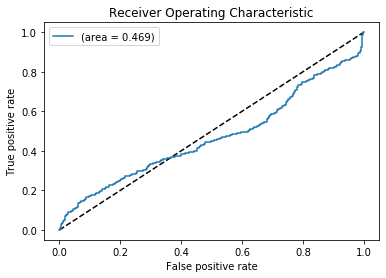

 40%|████      | 2/5 [20:50<31:40, 633.63s/it]

Epoch 1/100
113/113 [==============================] - 6s 54ms/step - loss: 0.6548 - accuracy: 0.6448 - val_loss: 0.7131 - val_accuracy: 0.5034
Epoch 2/100
113/113 [==============================] - 6s 52ms/step - loss: 0.5716 - accuracy: 0.7365 - val_loss: 0.7179 - val_accuracy: 0.5034
Epoch 3/100
113/113 [==============================] - 6s 52ms/step - loss: 0.5386 - accuracy: 0.7578 - val_loss: 0.6949 - val_accuracy: 0.4594
Epoch 4/100
113/113 [==============================] - 6s 53ms/step - loss: 0.5020 - accuracy: 0.7917 - val_loss: 0.6887 - val_accuracy: 0.4822
Epoch 5/100
113/113 [==============================] - 6s 53ms/step - loss: 0.4717 - accuracy: 0.8173 - val_loss: 0.7358 - val_accuracy: 0.4856
Epoch 6/100
113/113 [==============================] - 6s 53ms/step - loss: 0.4496 - accuracy: 0.8320 - val_loss: 0.8000 - val_accuracy: 0.4822
Epoch 7/100
113/113 [==============================] - 6s 54ms/step - loss: 0.4248 - accuracy: 0.8437 - val_loss: 0.8063 - val_accuracy:

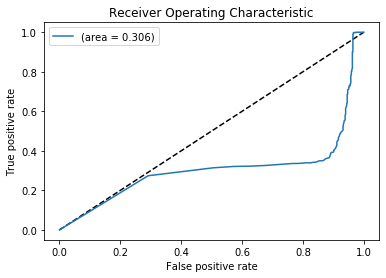

 60%|██████    | 3/5 [30:57<20:51, 625.60s/it]

Epoch 1/100
125/125 [==============================] - 6s 51ms/step - loss: 0.6726 - accuracy: 0.5963 - val_loss: 0.6786 - val_accuracy: 0.6084
Epoch 2/100
125/125 [==============================] - 6s 50ms/step - loss: 0.6223 - accuracy: 0.7096 - val_loss: 0.6901 - val_accuracy: 0.4544
Epoch 3/100
125/125 [==============================] - 6s 50ms/step - loss: 0.5896 - accuracy: 0.7373 - val_loss: 0.7728 - val_accuracy: 0.4557
Epoch 4/100
125/125 [==============================] - 6s 50ms/step - loss: 0.5643 - accuracy: 0.7585 - val_loss: 0.8016 - val_accuracy: 0.4557
Epoch 5/100
125/125 [==============================] - 6s 50ms/step - loss: 0.5318 - accuracy: 0.7922 - val_loss: 0.8215 - val_accuracy: 0.4557
Epoch 6/100
125/125 [==============================] - 6s 50ms/step - loss: 0.5141 - accuracy: 0.8036 - val_loss: 0.8375 - val_accuracy: 0.4557
Epoch 7/100
125/125 [==============================] - 6s 50ms/step - loss: 0.5201 - accuracy: 0.7865 - val_loss: 0.8536 - val_accuracy:

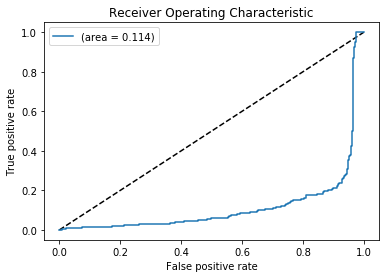

 80%|████████  | 4/5 [41:31<10:28, 628.28s/it]

Epoch 1/100
125/125 [==============================] - 6s 51ms/step - loss: 0.6389 - accuracy: 0.6798 - val_loss: 0.6918 - val_accuracy: 0.5336
Epoch 2/100
125/125 [==============================] - 6s 51ms/step - loss: 0.5971 - accuracy: 0.7334 - val_loss: 0.7391 - val_accuracy: 0.4664
Epoch 3/100
125/125 [==============================] - 6s 50ms/step - loss: 0.5717 - accuracy: 0.7552 - val_loss: 0.8303 - val_accuracy: 0.4664
Epoch 4/100
125/125 [==============================] - 6s 50ms/step - loss: 0.5377 - accuracy: 0.7741 - val_loss: 0.8517 - val_accuracy: 0.4664
Epoch 5/100
125/125 [==============================] - 6s 50ms/step - loss: 0.5234 - accuracy: 0.7756 - val_loss: 0.8691 - val_accuracy: 0.4664
Epoch 6/100
125/125 [==============================] - 6s 50ms/step - loss: 0.5055 - accuracy: 0.7876 - val_loss: 0.8869 - val_accuracy: 0.4664
Epoch 7/100
125/125 [==============================] - 6s 50ms/step - loss: 0.4921 - accuracy: 0.7944 - val_loss: 0.9024 - val_accuracy:

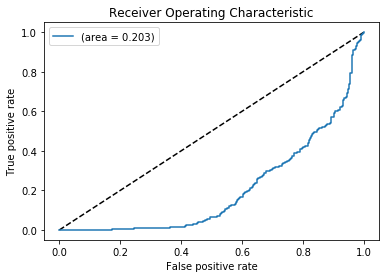

100%|██████████| 5/5 [52:10<00:00, 626.05s/it]


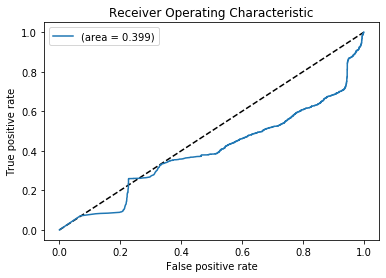

[0.5512756748037424, 0.5314800879406253, 0.6936151632714413, 0.8855325914149443, 0.7973892773892775]


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/100
64/64 [==============================] - 5s 85ms/step - loss: 0.6902 - accuracy: 0.5467 - val_loss: 0.6918 - val_accuracy: 0.5283
Epoch 2/100
64/64 [==============================] - 5s 82ms/step - loss: 0.6813 - accuracy: 0.5790 - val_loss: 0.6818 - val_accuracy: 0.5594
Epoch 3/100
64/64 [==============================] - 5s 82ms/step - loss: 0.6690 - accuracy: 0.5956 - val_loss: 0.6785 - val_accuracy: 0.5795
Epoch 4/100
64/64 [==============================] - 5s 83ms/step - loss: 0.6452 - accuracy: 0.6504 - val_loss: 0.6710 - val_accuracy: 0.5887
Epoch 5/100
64/64 [==============================] - 5s 83ms/step - loss: 0.6349 - accuracy: 0.6645 - val_loss: 0.6781 - val_accuracy: 0.5905
Epoch 6/100
64/64 [==============================] - 5s 82ms/step - loss: 0.6245 - accuracy: 0.6817 - val_loss: 0.6800 - val_accuracy: 0.5868
Epoch 7/100
64/64 [==============================] - 5s 82ms/step - loss: 0.6083 - accuracy: 0.6973 - val_loss: 0.6828 - val_accuracy: 0.5740
Epoch 

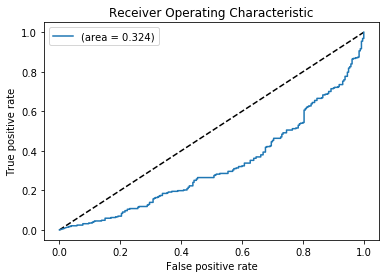

 20%|██        | 1/5 [08:57<35:51, 537.94s/it]

Epoch 1/100
67/67 [==============================] - 6s 83ms/step - loss: 0.6804 - accuracy: 0.5660 - val_loss: 0.7035 - val_accuracy: 0.4513
Epoch 2/100
67/67 [==============================] - 5s 81ms/step - loss: 0.6429 - accuracy: 0.6392 - val_loss: 0.7308 - val_accuracy: 0.4936
Epoch 3/100
67/67 [==============================] - 5s 81ms/step - loss: 0.6291 - accuracy: 0.6623 - val_loss: 0.7890 - val_accuracy: 0.4958
Epoch 4/100
67/67 [==============================] - 5s 80ms/step - loss: 0.6118 - accuracy: 0.6816 - val_loss: 0.8083 - val_accuracy: 0.5000
Epoch 5/100
67/67 [==============================] - 5s 81ms/step - loss: 0.5981 - accuracy: 0.6972 - val_loss: 0.7890 - val_accuracy: 0.5127
Epoch 6/100
67/67 [==============================] - 5s 81ms/step - loss: 0.5806 - accuracy: 0.7142 - val_loss: 0.8466 - val_accuracy: 0.5042
Epoch 7/100
67/67 [==============================] - 5s 81ms/step - loss: 0.5612 - accuracy: 0.7325 - val_loss: 0.7563 - val_accuracy: 0.5572
Epoch 

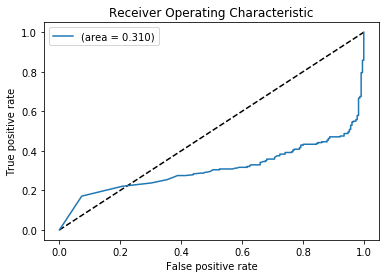

 40%|████      | 2/5 [18:09<27:05, 541.94s/it]

Epoch 1/100
56/56 [==============================] - 5s 86ms/step - loss: 0.6797 - accuracy: 0.5689 - val_loss: 0.6855 - val_accuracy: 0.6076
Epoch 2/100
56/56 [==============================] - 5s 84ms/step - loss: 0.6182 - accuracy: 0.6959 - val_loss: 0.6937 - val_accuracy: 0.6015
Epoch 3/100
56/56 [==============================] - 5s 84ms/step - loss: 0.5778 - accuracy: 0.7409 - val_loss: 0.7511 - val_accuracy: 0.5031
Epoch 4/100
56/56 [==============================] - 5s 84ms/step - loss: 0.5400 - accuracy: 0.7825 - val_loss: 0.7380 - val_accuracy: 0.5264
Epoch 5/100
56/56 [==============================] - 5s 84ms/step - loss: 0.5288 - accuracy: 0.7864 - val_loss: 0.8462 - val_accuracy: 0.4293
Epoch 6/100
56/56 [==============================] - 5s 85ms/step - loss: 0.5182 - accuracy: 0.7886 - val_loss: 0.9145 - val_accuracy: 0.3739
Epoch 7/100
56/56 [==============================] - 5s 84ms/step - loss: 0.4912 - accuracy: 0.8201 - val_loss: 0.8912 - val_accuracy: 0.3899
Epoch 

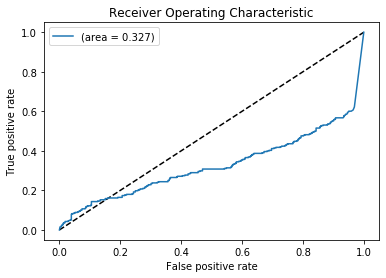

 60%|██████    | 3/5 [26:12<17:28, 524.40s/it]

Epoch 1/100
62/62 [==============================] - 5s 84ms/step - loss: 0.6953 - accuracy: 0.5204 - val_loss: 0.6901 - val_accuracy: 0.5637
Epoch 2/100
62/62 [==============================] - 5s 82ms/step - loss: 0.6736 - accuracy: 0.5932 - val_loss: 0.6727 - val_accuracy: 0.6481
Epoch 3/100
62/62 [==============================] - 5s 82ms/step - loss: 0.6376 - accuracy: 0.6578 - val_loss: 0.6681 - val_accuracy: 0.6210
Epoch 4/100
62/62 [==============================] - 5s 82ms/step - loss: 0.6077 - accuracy: 0.6930 - val_loss: 0.7177 - val_accuracy: 0.4952
Epoch 5/100
62/62 [==============================] - 5s 81ms/step - loss: 0.5685 - accuracy: 0.7475 - val_loss: 0.7167 - val_accuracy: 0.5175
Epoch 6/100
62/62 [==============================] - 5s 82ms/step - loss: 0.5671 - accuracy: 0.7444 - val_loss: 0.7886 - val_accuracy: 0.4443
Epoch 7/100
62/62 [==============================] - 5s 82ms/step - loss: 0.5433 - accuracy: 0.7719 - val_loss: 0.7480 - val_accuracy: 0.5080
Epoch 

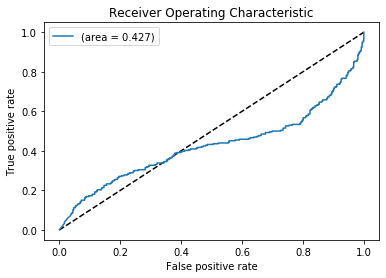

 80%|████████  | 4/5 [34:53<08:43, 523.21s/it]

Epoch 1/100
77/77 [==============================] - 6s 81ms/step - loss: 0.6784 - accuracy: 0.5780 - val_loss: 0.7205 - val_accuracy: 0.0379
Epoch 2/100
77/77 [==============================] - 6s 79ms/step - loss: 0.6684 - accuracy: 0.5984 - val_loss: 0.6760 - val_accuracy: 0.9394
Epoch 3/100
77/77 [==============================] - 6s 79ms/step - loss: 0.6651 - accuracy: 0.6012 - val_loss: 0.7146 - val_accuracy: 0.4773
Epoch 4/100
77/77 [==============================] - 6s 79ms/step - loss: 0.6567 - accuracy: 0.6220 - val_loss: 0.9742 - val_accuracy: 0.0227
Epoch 5/100
77/77 [==============================] - 6s 79ms/step - loss: 0.6513 - accuracy: 0.6325 - val_loss: 0.9468 - val_accuracy: 0.0909
Epoch 6/100
77/77 [==============================] - 6s 79ms/step - loss: 0.6412 - accuracy: 0.6431 - val_loss: 0.8732 - val_accuracy: 0.2500
Epoch 7/100
77/77 [==============================] - 6s 79ms/step - loss: 0.6250 - accuracy: 0.6736 - val_loss: 1.0053 - val_accuracy: 0.0833
Epoch 

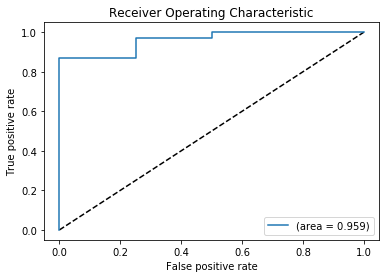

100%|██████████| 5/5 [45:15<00:00, 543.11s/it]


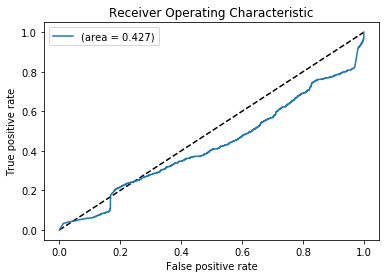

[0.6764339319217367, 0.6898168103448276, 0.6730418657279356, 0.5732719229011756, 0.958984375]


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/100
138/138 [==============================] - 12s 83ms/step - loss: 0.6928 - accuracy: 0.5286 - val_loss: 0.7068 - val_accuracy: 0.4298
Epoch 2/100
138/138 [==============================] - 12s 86ms/step - loss: 0.6727 - accuracy: 0.5789 - val_loss: 0.7078 - val_accuracy: 0.4713
Epoch 3/100
138/138 [==============================] - 12s 87ms/step - loss: 0.6538 - accuracy: 0.6166 - val_loss: 0.7177 - val_accuracy: 0.4621
Epoch 4/100
138/138 [==============================] - 11s 82ms/step - loss: 0.6390 - accuracy: 0.6461 - val_loss: 0.7040 - val_accuracy: 0.5055
Epoch 5/100
138/138 [==============================] - 11s 82ms/step - loss: 0.6167 - accuracy: 0.6736 - val_loss: 0.7245 - val_accuracy: 0.4760
Epoch 6/100
138/138 [==============================] - 11s 83ms/step - loss: 0.5966 - accuracy: 0.6991 - val_loss: 0.7223 - val_accuracy: 0.4898
Epoch 7/100
138/138 [==============================] - 12s 83ms/step - loss: 0.5770 - accuracy: 0.7150 - val_loss: 0.7143 - val_ac

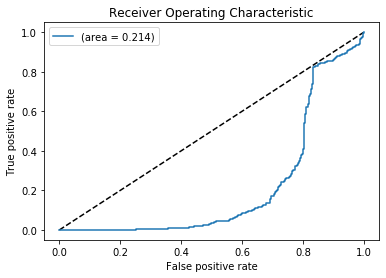

 20%|██        | 1/5 [19:31<1:18:07, 1171.84s/it]

Epoch 1/100
136/136 [==============================] - 12s 88ms/step - loss: 0.6868 - accuracy: 0.5518 - val_loss: 0.7014 - val_accuracy: 0.4853
Epoch 2/100
136/136 [==============================] - 12s 87ms/step - loss: 0.6730 - accuracy: 0.5827 - val_loss: 0.7324 - val_accuracy: 0.4965
Epoch 3/100
136/136 [==============================] - 12s 86ms/step - loss: 0.6597 - accuracy: 0.6104 - val_loss: 0.8550 - val_accuracy: 0.3622
Epoch 4/100
136/136 [==============================] - 12s 86ms/step - loss: 0.6471 - accuracy: 0.6319 - val_loss: 0.8227 - val_accuracy: 0.3925
Epoch 5/100
136/136 [==============================] - 12s 86ms/step - loss: 0.6368 - accuracy: 0.6435 - val_loss: 0.8566 - val_accuracy: 0.3683
Epoch 6/100
136/136 [==============================] - 12s 86ms/step - loss: 0.6256 - accuracy: 0.6698 - val_loss: 0.7971 - val_accuracy: 0.5000
Epoch 7/100
136/136 [==============================] - 11s 84ms/step - loss: 0.6105 - accuracy: 0.6837 - val_loss: 0.8293 - val_ac

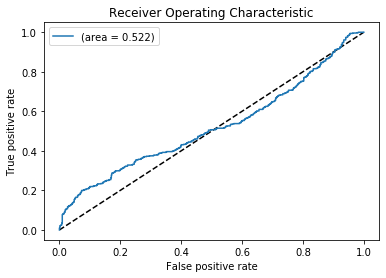

 40%|████      | 2/5 [38:56<58:28, 1169.60s/it]  

Epoch 1/100
132/132 [==============================] - 11s 86ms/step - loss: 0.6911 - accuracy: 0.5344 - val_loss: 0.6962 - val_accuracy: 0.4842
Epoch 2/100
132/132 [==============================] - 11s 87ms/step - loss: 0.6821 - accuracy: 0.5633 - val_loss: 0.7011 - val_accuracy: 0.4889
Epoch 3/100
132/132 [==============================] - 11s 86ms/step - loss: 0.6700 - accuracy: 0.5787 - val_loss: 0.7182 - val_accuracy: 0.4588
Epoch 4/100
132/132 [==============================] - 11s 85ms/step - loss: 0.6536 - accuracy: 0.6126 - val_loss: 0.7607 - val_accuracy: 0.4208
Epoch 5/100
132/132 [==============================] - 11s 87ms/step - loss: 0.6279 - accuracy: 0.6600 - val_loss: 0.7216 - val_accuracy: 0.4572
Epoch 6/100
132/132 [==============================] - 11s 86ms/step - loss: 0.6082 - accuracy: 0.6818 - val_loss: 0.7576 - val_accuracy: 0.4128
Epoch 7/100
132/132 [==============================] - 11s 85ms/step - loss: 0.5883 - accuracy: 0.7100 - val_loss: 0.7643 - val_ac

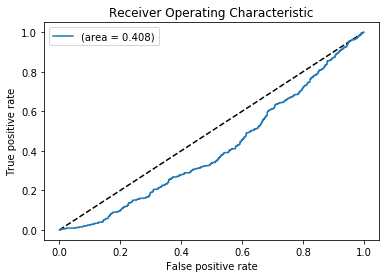

 60%|██████    | 3/5 [58:01<38:44, 1162.18s/it]

Epoch 1/100
138/138 [==============================] - 12s 87ms/step - loss: 0.6800 - accuracy: 0.5777 - val_loss: 0.7004 - val_accuracy: 0.4439
Epoch 2/100
138/138 [==============================] - 12s 84ms/step - loss: 0.6737 - accuracy: 0.5916 - val_loss: 0.7387 - val_accuracy: 0.4959
Epoch 3/100
138/138 [==============================] - 12s 84ms/step - loss: 0.6542 - accuracy: 0.6374 - val_loss: 0.7664 - val_accuracy: 0.4421
Epoch 4/100
138/138 [==============================] - 12s 86ms/step - loss: 0.6430 - accuracy: 0.6559 - val_loss: 0.8146 - val_accuracy: 0.3400
Epoch 5/100
138/138 [==============================] - 12s 84ms/step - loss: 0.6327 - accuracy: 0.6700 - val_loss: 0.8137 - val_accuracy: 0.3582
Epoch 6/100
138/138 [==============================] - 12s 87ms/step - loss: 0.6258 - accuracy: 0.6764 - val_loss: 0.7634 - val_accuracy: 0.4932
Epoch 7/100
138/138 [==============================] - 12s 87ms/step - loss: 0.6342 - accuracy: 0.6623 - val_loss: 0.8234 - val_ac

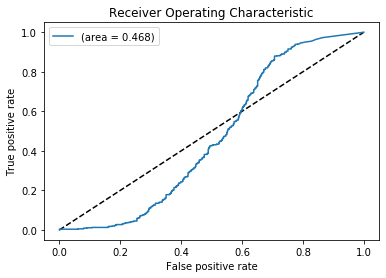

 80%|████████  | 4/5 [1:17:52<19:31, 1171.06s/it]

Epoch 1/100
144/144 [==============================] - 12s 86ms/step - loss: 0.6928 - accuracy: 0.5203 - val_loss: 0.6974 - val_accuracy: 0.4893
Epoch 2/100
144/144 [==============================] - 12s 84ms/step - loss: 0.6812 - accuracy: 0.5763 - val_loss: 0.7091 - val_accuracy: 0.4724
Epoch 3/100
144/144 [==============================] - 12s 84ms/step - loss: 0.6725 - accuracy: 0.5950 - val_loss: 0.7196 - val_accuracy: 0.4915
Epoch 4/100
144/144 [==============================] - 12s 83ms/step - loss: 0.6678 - accuracy: 0.6028 - val_loss: 0.7187 - val_accuracy: 0.5017
Epoch 5/100
144/144 [==============================] - 12s 83ms/step - loss: 0.6600 - accuracy: 0.6205 - val_loss: 0.7259 - val_accuracy: 0.4972
Epoch 6/100
144/144 [==============================] - 12s 83ms/step - loss: 0.6529 - accuracy: 0.6305 - val_loss: 0.7219 - val_accuracy: 0.4949
Epoch 7/100
144/144 [==============================] - 12s 84ms/step - loss: 0.6549 - accuracy: 0.6215 - val_loss: 0.7183 - val_ac

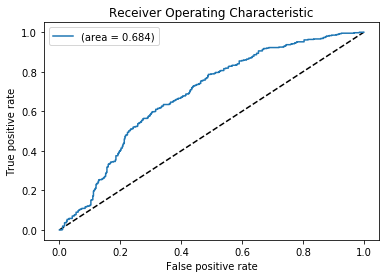

100%|██████████| 5/5 [1:37:55<00:00, 1175.08s/it]


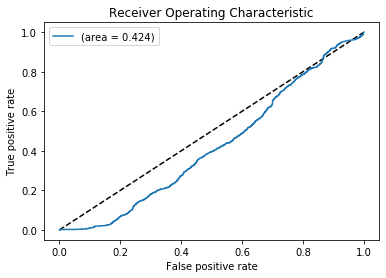

[0.7858557517742202, 0.521623592688819, 0.5920160509201605, 0.532146537681593, 0.6842364708166038]


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/100
64/64 [==============================] - 4s 55ms/step - loss: 0.6429 - accuracy: 0.6290 - val_loss: 0.7047 - val_accuracy: 0.4046
Epoch 2/100
64/64 [==============================] - 3s 51ms/step - loss: 0.5882 - accuracy: 0.7276 - val_loss: 0.6857 - val_accuracy: 0.5996
Epoch 3/100
64/64 [==============================] - 3s 50ms/step - loss: 0.5659 - accuracy: 0.7360 - val_loss: 0.6686 - val_accuracy: 0.6079
Epoch 4/100
64/64 [==============================] - 3s 51ms/step - loss: 0.5365 - accuracy: 0.7563 - val_loss: 0.6860 - val_accuracy: 0.6037
Epoch 5/100
64/64 [==============================] - 3s 51ms/step - loss: 0.5153 - accuracy: 0.7746 - val_loss: 0.6733 - val_accuracy: 0.6079
Epoch 6/100
64/64 [==============================] - 3s 51ms/step - loss: 0.5160 - accuracy: 0.7761 - val_loss: 0.7017 - val_accuracy: 0.6058
Epoch 7/100
64/64 [==============================] - 3s 50ms/step - loss: 0.4900 - accuracy: 0.7999 - val_loss: 0.7230 - val_accuracy: 0.6079
Epoch 

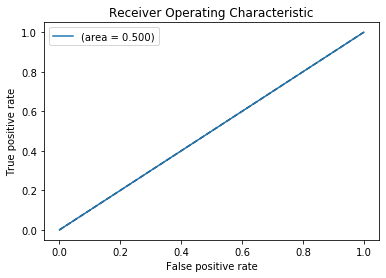

 20%|██        | 1/5 [05:35<22:21, 335.27s/it]

Epoch 1/100
63/63 [==============================] - 3s 53ms/step - loss: 0.6941 - accuracy: 0.4970 - val_loss: 0.6927 - val_accuracy: 0.5112
Epoch 2/100
63/63 [==============================] - 3s 53ms/step - loss: 0.6900 - accuracy: 0.5871 - val_loss: 0.6928 - val_accuracy: 0.5112
Epoch 3/100
63/63 [==============================] - 3s 51ms/step - loss: 0.6725 - accuracy: 0.6488 - val_loss: 0.6931 - val_accuracy: 0.4888
Epoch 4/100
63/63 [==============================] - 3s 53ms/step - loss: 0.6404 - accuracy: 0.6930 - val_loss: 0.6924 - val_accuracy: 0.4888
Epoch 5/100
63/63 [==============================] - 3s 53ms/step - loss: 0.6120 - accuracy: 0.7249 - val_loss: 0.6792 - val_accuracy: 0.6884
Epoch 6/100
63/63 [==============================] - 3s 52ms/step - loss: 0.6023 - accuracy: 0.7075 - val_loss: 0.6778 - val_accuracy: 0.6375
Epoch 7/100
63/63 [==============================] - 3s 55ms/step - loss: 0.5769 - accuracy: 0.7393 - val_loss: 0.6457 - val_accuracy: 0.7332
Epoch 

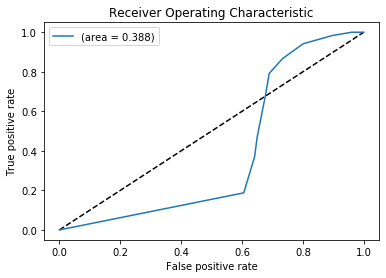

 40%|████      | 2/5 [11:06<16:42, 334.08s/it]

Epoch 1/100
61/61 [==============================] - 3s 54ms/step - loss: 0.6763 - accuracy: 0.5780 - val_loss: 0.6815 - val_accuracy: 0.5805
Epoch 2/100
61/61 [==============================] - 3s 52ms/step - loss: 0.6369 - accuracy: 0.6612 - val_loss: 0.6809 - val_accuracy: 0.5805
Epoch 3/100
61/61 [==============================] - 3s 52ms/step - loss: 0.5575 - accuracy: 0.7557 - val_loss: 0.7085 - val_accuracy: 0.4195
Epoch 4/100
61/61 [==============================] - 3s 52ms/step - loss: 0.4836 - accuracy: 0.8264 - val_loss: 0.7913 - val_accuracy: 0.4195
Epoch 5/100
61/61 [==============================] - 3s 53ms/step - loss: 0.4351 - accuracy: 0.8698 - val_loss: 0.8961 - val_accuracy: 0.4195
Epoch 6/100
61/61 [==============================] - 3s 52ms/step - loss: 0.4169 - accuracy: 0.8724 - val_loss: 0.9212 - val_accuracy: 0.4195
Epoch 7/100
61/61 [==============================] - 3s 52ms/step - loss: 0.4049 - accuracy: 0.8750 - val_loss: 0.9433 - val_accuracy: 0.4195
Epoch 

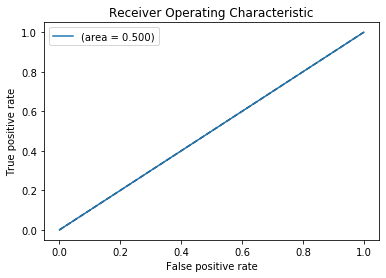

 60%|██████    | 3/5 [16:32<11:02, 331.49s/it]

Epoch 1/100
62/62 [==============================] - 3s 55ms/step - loss: 0.6771 - accuracy: 0.5806 - val_loss: 0.7076 - val_accuracy: 0.4348
Epoch 2/100
62/62 [==============================] - 3s 52ms/step - loss: 0.5978 - accuracy: 0.7013 - val_loss: 0.7260 - val_accuracy: 0.3989
Epoch 3/100
62/62 [==============================] - 3s 52ms/step - loss: 0.5527 - accuracy: 0.7617 - val_loss: 0.7479 - val_accuracy: 0.3894
Epoch 4/100
62/62 [==============================] - 3s 52ms/step - loss: 0.5282 - accuracy: 0.7819 - val_loss: 0.7511 - val_accuracy: 0.4234
Epoch 5/100
62/62 [==============================] - 3s 52ms/step - loss: 0.5025 - accuracy: 0.7992 - val_loss: 0.7592 - val_accuracy: 0.4348
Epoch 6/100
62/62 [==============================] - 3s 52ms/step - loss: 0.4746 - accuracy: 0.8154 - val_loss: 0.7713 - val_accuracy: 0.4121
Epoch 7/100
62/62 [==============================] - 3s 51ms/step - loss: 0.4596 - accuracy: 0.8235 - val_loss: 0.7856 - val_accuracy: 0.4707
Epoch 

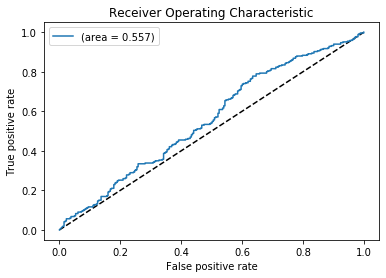

 80%|████████  | 4/5 [22:15<05:34, 334.96s/it]

Epoch 1/100
65/65 [==============================] - 3s 53ms/step - loss: 0.6587 - accuracy: 0.6149 - val_loss: 0.7065 - val_accuracy: 0.3180
Epoch 2/100
65/65 [==============================] - 3s 52ms/step - loss: 0.6029 - accuracy: 0.6841 - val_loss: 0.7099 - val_accuracy: 0.2995
Epoch 3/100
65/65 [==============================] - 3s 52ms/step - loss: 0.5538 - accuracy: 0.7233 - val_loss: 0.7205 - val_accuracy: 0.2995
Epoch 4/100
65/65 [==============================] - 3s 52ms/step - loss: 0.5140 - accuracy: 0.7721 - val_loss: 0.7150 - val_accuracy: 0.3157
Epoch 5/100
65/65 [==============================] - 3s 51ms/step - loss: 0.4885 - accuracy: 0.8007 - val_loss: 0.9734 - val_accuracy: 0.2949
Epoch 6/100
65/65 [==============================] - 3s 51ms/step - loss: 0.4851 - accuracy: 0.7983 - val_loss: 1.0600 - val_accuracy: 0.2949
Epoch 7/100
65/65 [==============================] - 3s 51ms/step - loss: 0.4583 - accuracy: 0.8263 - val_loss: 1.1618 - val_accuracy: 0.2949
Epoch 

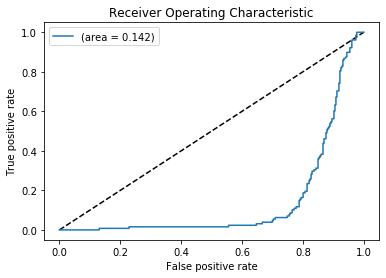

100%|██████████| 5/5 [27:57<00:00, 335.49s/it]


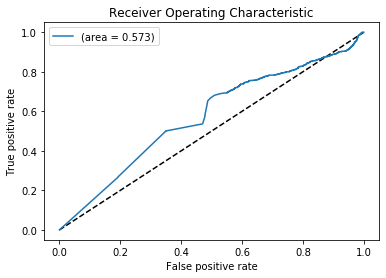

[0.5, 0.612367197875166, 0.5, 0.5574701964035564, 0.8581367442810457]


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/100
133/133 [==============================] - 7s 54ms/step - loss: 0.5979 - accuracy: 0.7249 - val_loss: 0.6880 - val_accuracy: 0.5788
Epoch 2/100
133/133 [==============================] - 7s 56ms/step - loss: 0.5061 - accuracy: 0.8195 - val_loss: 0.6892 - val_accuracy: 0.5893
Epoch 3/100
133/133 [==============================] - 7s 56ms/step - loss: 0.4636 - accuracy: 0.8475 - val_loss: 0.7230 - val_accuracy: 0.5893
Epoch 4/100
133/133 [==============================] - 7s 54ms/step - loss: 0.4394 - accuracy: 0.8548 - val_loss: 0.7366 - val_accuracy: 0.5893
Epoch 5/100
133/133 [==============================] - 7s 54ms/step - loss: 0.4243 - accuracy: 0.8593 - val_loss: 0.7473 - val_accuracy: 0.5893
Epoch 6/100
133/133 [==============================] - 7s 54ms/step - loss: 0.4047 - accuracy: 0.8699 - val_loss: 0.7595 - val_accuracy: 0.5893
Epoch 7/100
133/133 [==============================] - 7s 53ms/step - loss: 0.3983 - accuracy: 0.8715 - val_loss: 0.7702 - val_accuracy:

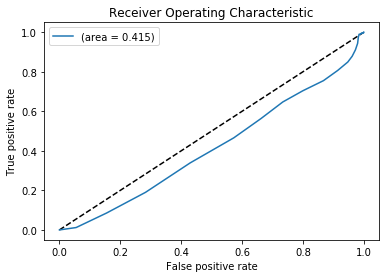

 20%|██        | 1/5 [12:13<48:55, 733.89s/it]

Epoch 1/100
150/150 [==============================] - 8s 51ms/step - loss: 0.6532 - accuracy: 0.6271 - val_loss: 0.6956 - val_accuracy: 0.5846
Epoch 2/100
150/150 [==============================] - 8s 50ms/step - loss: 0.5827 - accuracy: 0.7125 - val_loss: 0.6297 - val_accuracy: 0.7650
Epoch 3/100
150/150 [==============================] - 8s 50ms/step - loss: 0.5493 - accuracy: 0.7497 - val_loss: 0.8346 - val_accuracy: 0.4154
Epoch 4/100
150/150 [==============================] - 8s 51ms/step - loss: 0.5330 - accuracy: 0.7605 - val_loss: 0.8474 - val_accuracy: 0.4154
Epoch 5/100
150/150 [==============================] - 8s 50ms/step - loss: 0.5197 - accuracy: 0.7704 - val_loss: 0.8658 - val_accuracy: 0.4154
Epoch 6/100
150/150 [==============================] - 8s 51ms/step - loss: 0.5033 - accuracy: 0.7783 - val_loss: 0.8826 - val_accuracy: 0.4154
Epoch 7/100
150/150 [==============================] - 8s 50ms/step - loss: 0.4876 - accuracy: 0.7950 - val_loss: 0.8997 - val_accuracy:

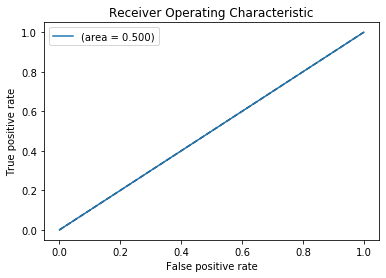

 40%|████      | 2/5 [24:58<37:09, 743.21s/it]

Epoch 1/100
142/142 [==============================] - 7s 52ms/step - loss: 0.6521 - accuracy: 0.6449 - val_loss: 0.6831 - val_accuracy: 0.5748
Epoch 2/100
142/142 [==============================] - 7s 52ms/step - loss: 0.5865 - accuracy: 0.7398 - val_loss: 0.7083 - val_accuracy: 0.4252
Epoch 3/100
142/142 [==============================] - 7s 51ms/step - loss: 0.5251 - accuracy: 0.7891 - val_loss: 0.7680 - val_accuracy: 0.4173
Epoch 4/100
142/142 [==============================] - 7s 52ms/step - loss: 0.4826 - accuracy: 0.8196 - val_loss: 0.8947 - val_accuracy: 0.4252
Epoch 5/100
142/142 [==============================] - 7s 51ms/step - loss: 0.4543 - accuracy: 0.8339 - val_loss: 0.9349 - val_accuracy: 0.4252
Epoch 6/100
142/142 [==============================] - 7s 51ms/step - loss: 0.4258 - accuracy: 0.8498 - val_loss: 0.9709 - val_accuracy: 0.4252
Epoch 7/100
142/142 [==============================] - 7s 51ms/step - loss: 0.4067 - accuracy: 0.8615 - val_loss: 1.0029 - val_accuracy:

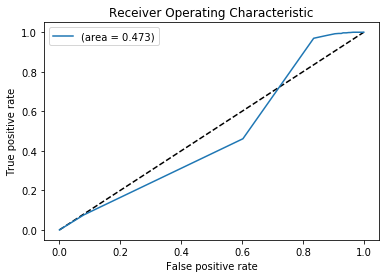

 60%|██████    | 3/5 [37:16<24:43, 741.69s/it]

Epoch 1/100
140/140 [==============================] - 7s 53ms/step - loss: 0.6537 - accuracy: 0.6631 - val_loss: 0.7046 - val_accuracy: 0.4659
Epoch 2/100
140/140 [==============================] - 7s 52ms/step - loss: 0.5704 - accuracy: 0.7685 - val_loss: 0.7321 - val_accuracy: 0.4734
Epoch 3/100
140/140 [==============================] - 7s 52ms/step - loss: 0.5214 - accuracy: 0.8032 - val_loss: 0.7398 - val_accuracy: 0.5407
Epoch 4/100
140/140 [==============================] - 7s 52ms/step - loss: 0.4825 - accuracy: 0.8247 - val_loss: 0.7627 - val_accuracy: 0.5390
Epoch 5/100
140/140 [==============================] - 7s 52ms/step - loss: 0.4471 - accuracy: 0.8451 - val_loss: 0.7792 - val_accuracy: 0.5390
Epoch 6/100
140/140 [==============================] - 7s 52ms/step - loss: 0.4245 - accuracy: 0.8576 - val_loss: 0.7944 - val_accuracy: 0.5390
Epoch 7/100
140/140 [==============================] - 7s 52ms/step - loss: 0.3925 - accuracy: 0.8787 - val_loss: 0.8133 - val_accuracy:

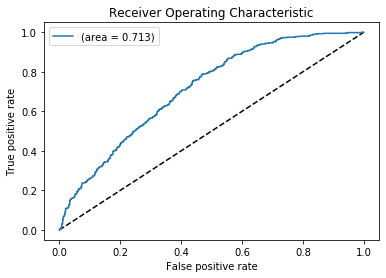

 80%|████████  | 4/5 [49:33<12:20, 740.15s/it]

Epoch 1/100
146/146 [==============================] - 8s 52ms/step - loss: 0.6421 - accuracy: 0.6551 - val_loss: 0.6941 - val_accuracy: 0.4055
Epoch 2/100
146/146 [==============================] - 7s 50ms/step - loss: 0.5754 - accuracy: 0.7181 - val_loss: 0.6643 - val_accuracy: 0.5906
Epoch 3/100
146/146 [==============================] - 7s 50ms/step - loss: 0.5377 - accuracy: 0.7542 - val_loss: 0.6223 - val_accuracy: 0.5886
Epoch 4/100
146/146 [==============================] - 7s 51ms/step - loss: 0.4965 - accuracy: 0.7845 - val_loss: 0.7531 - val_accuracy: 0.5935
Epoch 5/100
146/146 [==============================] - 7s 50ms/step - loss: 0.4647 - accuracy: 0.8135 - val_loss: 0.7609 - val_accuracy: 0.5945
Epoch 6/100
146/146 [==============================] - 7s 50ms/step - loss: 0.4331 - accuracy: 0.8338 - val_loss: 0.7785 - val_accuracy: 0.5935
Epoch 7/100
146/146 [==============================] - 7s 50ms/step - loss: 0.4220 - accuracy: 0.8402 - val_loss: 0.7897 - val_accuracy:

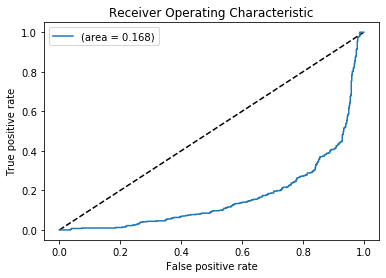

100%|██████████| 5/5 [1:02:01<00:00, 744.20s/it]


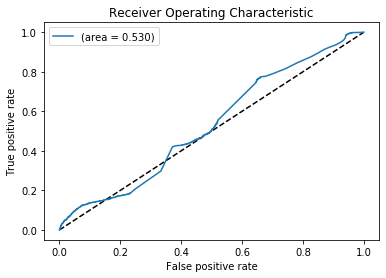

[0.5847163419099617, 0.5, 0.5271514115163701, 0.712905509515679, 0.8315180164394036]


In [4]:
for folder in folders:
    myclf = ML.Classifier(os.path.basename(os.path.dirname(folder)))
    myclf.KfoldCrossVal(folder, reference_path, filter_band="nofilter", model_type='CNN')